In [ ]:
import os
import pandas as pd
from src.tools.geomap_tools import haversine

# Define the root folder
root_folder = 'data/external/drones/'

# List to hold individual DataFrames
dataframes = []

# Walk through the directory structure
for subdir, _, files in os.walk(root_folder):
    for file in files:
        # Check if the file is a Parquet file
        if file.endswith('.parquet'):
            file_path = os.path.join(subdir, file)
            # Read the Parquet file into a DataFrame
            df = pd.read_parquet(file_path)
            dataframes.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.timestamp = pd.to_datetime(combined_df.timestamp, unit="s")

In [ ]:
pd.read_csv("data/external/antennas.csv")

,id,type,name,owned,description
0,1,AEROSCOPEv1,0QRDE8F0010496,True,Original antenna from EIH.
1,2,AEROSCOPEv2,0QRDJCAR037P0N,True,From CDG.
2,3,AEROSCOPEv2,0QRDKC2R03J32P,True,3rd bought.
3,4,AEROSCOPEv2,0QRDKC2R038370,True,In BDX.
4,6,SENNHIVE,NONE,False,Via ASD.
5,7,AVIONIX,NONE,False,New REMOTE-ID antenna.
6,8,AEROSCOPEv2,0QRDJCAR0383TD,False,New antenna from ASD


In [ ]:
pd.read_csv("data/external/installations.csv")

,id,site_id,antenna_id,start_at,end_at,comment
0,1,1,1,2021-07-20 00:00:00,2023-04-23 23:59:59,Start of ACUTE project.
1,2,2,2,2022-06-14 00:00:00,2023-02-27 23:59:59,Loan then buy of the CDG antenna.
2,3,3,2,2023-03-01 00:00:00,2024-06-03 23:59:59,1st installation on ECTL LUX premises.
3,4,4,3,2023-06-20 00:00:00,2024-01-24 23:59:59,HQ antenna.
4,5,6,4,2023-07-17 00:00:00,2023-10-12 23:59:59,Access to data from BDX.
5,6,5,1,2023-05-24 00:00:00,2023-09-18 23:59:59,Belfast.
6,7,7,1,2023-11-16 00:00:00,2024-10-17 23:59:59,Belfast to London.
7,8,8,3,2024-02-21 00:00:00,2024-08-27 23:59:59,BRU antenna to Cyprus.
8,9,2,4,2023-11-22 00:00:00,2024-01-22 23:59:59,CDG by ASD.
9,10,10,4,2024-04-09 00:00:00,2050-12-30 23:00:00,HQ to Vienna airport.


In [ ]:
combined_df = combined_df[(combined_df.station_name=="0QRDKC2R03J32P") & (combined_df.timestamp > "2024-02-21 00:00:00") & (combined_df.timestamp < "2024-08-27 23:59:59")]

In [ ]:
combined_df

,journey,ident,model,source,location,timestamp,latitude,longitude,altitude,elevation,...,rssi,home_lat,home_lon,home_height,speed,heading,station_name,station_latitude,station_longitude,time
279173,40246,F6Z9C23AC003BVTX,DJI Mini4 Pro,as,1747321,2024-02-21 14:13:34,34.943218,33.621284,105.0,13,...,None,34.943894,33.620820,105.0,27,307,0QRDKC2R03J32P,34.876582,33.631517,NaN
279174,40246,F6Z9C23AC003BVTX,DJI Mini4 Pro,as,1747322,2024-02-21 14:14:03,34.943034,33.620493,105.0,17,...,None,34.943894,33.620820,105.0,29,8,0QRDKC2R03J32P,34.876582,33.631520,NaN
279175,40246,F6Z9C23AC003BVTX,DJI Mini4 Pro,as,1747324,2024-02-21 14:14:19,34.943086,33.620327,105.0,17,...,None,34.943894,33.620820,105.0,19,32,0QRDKC2R03J32P,34.876579,33.631520,NaN
279180,40246,F6Z9C23AC003BVTX,DJI Mini4 Pro,as,1747327,2024-02-21 14:14:46,34.943562,33.619800,102.0,15,...,None,34.943894,33.620820,102.0,0,68,0QRDKC2R03J32P,34.876576,33.631520,NaN
279181,40246,F6Z9C23AC003BVTX,DJI Mini4 Pro,as,1747335,2024-02-21 14:16:14,34.943607,33.620957,120.0,14,...,None,34.943894,33.620820,120.0,0,282,0QRDKC2R03J32P,34.876579,33.631517,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731136,59984,F6Z9C23CC003JKUT,DJI Mini4 Pro,as,2176689,2024-08-27 06:14:19,34.840847,33.575716,58,16,...,None,34.841162,33.575292,40.0,4,30,0QRDKC2R03J32P,34.876534,33.631526,NaN
731137,59984,F6Z9C23CC003JKUT,DJI Mini4 Pro,as,2176690,2024-08-27 06:14:47,34.840950,33.575619,44,17,...,None,34.841162,33.575292,26.0,1,108,0QRDKC2R03J32P,34.876531,33.631530,NaN
731138,59984,F6Z9C23CC003JKUT,DJI Mini4 Pro,as,2176691,2024-08-27 06:15:15,34.841157,33.575539,44,17,...,None,34.841162,33.575292,26.0,1,158,0QRDKC2R03J32P,34.876534,33.631526,NaN
731139,59984,F6Z9C23CC003JKUT,DJI Mini4 Pro,as,2176692,2024-08-27 06:15:35,34.841214,33.575636,46,17,...,None,34.841162,33.575292,28.0,0,136,0QRDKC2R03J32P,34.876538,33.631526,NaN


In [ ]:
combined_df["distance"] = haversine(combined_df.latitude, combined_df.longitude, combined_df.station_latitude, combined_df.station_longitude)

In [ ]:
combined_df[combined_df.distance < 50].shape[0] / combined_df.shape[0]

0.975689050735525

(array([1.14959e+05, 2.03700e+03, 2.60000e+01, 1.10000e+01, 1.10000e+01,
        5.00000e+00, 9.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.46000e+02]),
 array([2.26033111e-03, 1.74289169e+02, 3.48576077e+02, 5.22862986e+02,
        6.97149894e+02, 8.71436803e+02, 1.04572371e+03, 1.22001062e+03,
        1.39429753e+03, 1.56858444e+03, 1.74287135e+03, 1.91715825e+03,
        2.09144516e+03, 2.26573207e+03, 2.44001898e+03, 2.61430589e+03,
        2.78859280e+03, 2.96287970e+03, 3.13716661e+03, 3.31145352e+03,
        3.48574043e+03, 3.66002734e+03, 3.83431425e+03, 4.00860116e+03,
        4.18288806e+03, 4.35717497e+03, 4.53146188e+03, 4.70574879e+03,
        4.88003570e+03, 5.05432261e+03, 5.22860951e+03])

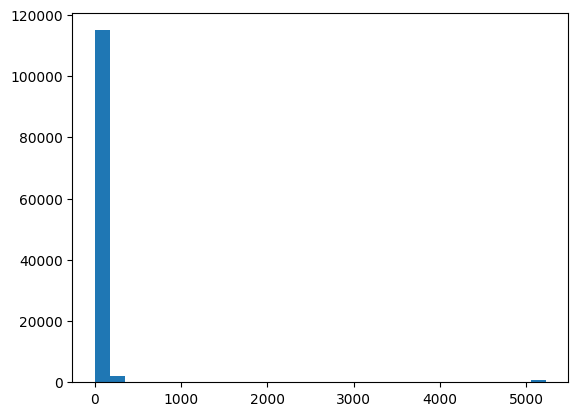

In [ ]:
import matplotlib.pyplot as plt
plt.hist(combined_df["distance"], bins=30)